In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

import importlib
from IPython.display import display, Markdown, Latex
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)

from src.utils import tree_utils
from src.features import feature_utils

### Load the maximum likelihood subtrees for SNLI

In [2]:
data = feature_utils.load_trees(output_dir="data/snli", dataset="snli")

parsed 65532/65532 trees
parsed 16380/16380 trees


In [3]:
print(data["dev"]["tree"][333])

(9
  (1
    (14
      (14 (41 a/a) (32 girl/kid))
      (10 (16 (75 in/) (94 a/)) (11 (70 green/) (70 shirt/))))
    (31 (77 jumps/sits) (2 (0 (59 in/in) (38 the/a)) (83 air/chair))))
  (90 ./.))


### Enumerate all of the subtrees and sort by mutual information

In [4]:
feature_utils.add_features(data, "Subtrees", feature_utils.subtrees)
subtrees = feature_utils.get_subtree_feature_table(data)
subtrees.head(15)

683820 Subtrees features


,Root,Subtree,Yield,MI,Count,Entailment,Contradiction,Neutral,Majority label,% majority
0,49,(49 *),ϵ/to,0.009520,2373.0,297.0,471.0,1605.0,Neutral,0.675926
1,49,(49 *),ϵ/for,0.006778,963.0,64.0,137.0,762.0,Neutral,0.789855
2,41,(41 *),a/the,0.006350,13054.0,2999.0,5127.0,4928.0,Contradiction,0.392740
3,32,(32 *),man/woman,0.005654,482.0,15.0,444.0,23.0,Contradiction,0.917526
4,14,(14 (41 *) (32 *)),a man/a woman,0.003906,276.0,8.0,267.0,1.0,Contradiction,0.960573
5,49,(49 *),ϵ/the,0.003427,2757.0,470.0,955.0,1332.0,Neutral,0.482971
6,49,(49 *),ϵ/a,0.003208,3117.0,624.0,964.0,1529.0,Neutral,0.490385
7,32,(32 *),woman/man,0.002678,265.0,12.0,235.0,18.0,Contradiction,0.880597
8,89,(89 *),a/there,0.002424,956.0,586.0,199.0,171.0,Entailment,0.612096
9,35,(35 *),ϵ/[UNK],0.002176,955.0,106.0,349.0,500.0,Neutral,0.522965


### Create aggregated features by merging subtrees by root non-terminal and majority class label

In [5]:
feature_utils.add_merges(data, "Subtrees", K=1000, merge_name="Subtree groups")
subtree_groups = feature_utils.get_merged_feature_table(data, merge_name="Subtree groups")
subtree_groups.head(15).sort_values(by=["Majority label idx", "MI"], ascending=False)

,Root,Examples,MI,Count,Entailment,Contradiction,Neutral,Majority label idx,Majority label,% majority,Support count,Counter count
0,49,"ϵ/to, ϵ/for, ϵ/the, ϵ/a, ϵ/his, ϵ/at, ϵ/their, ϵ/after",0.021651,14478.0,2753.0,4408.0,7317.0,2,Neutral,0.505352,7317.0,7161.0
1,35,"ϵ/[UNK], ϵ/work, ϵ/get, ϵ/friends, ϵ/park, ϵ/mother, ϵ/school, ϵ/day",0.015840,4675.0,593.0,1118.0,2964.0,2,Neutral,0.633818,2964.0,1711.0
4,85,"ϵ/tall, ϵ/sad, ϵ/[UNK], ϵ/new, ϵ/big, ϵ/professional, ϵ/favorite, ϵ/old",0.010309,1945.0,163.0,378.0,1404.0,2,Neutral,0.721253,1404.0,541.0
7,17,"ϵ/to work, ϵ/to get, ϵ/to buy, ϵ/the park, ϵ/on vacation, ϵ/to go, ϵ/first time, ϵ/the [UNK]",0.007060,1411.0,131.0,271.0,1009.0,2,Neutral,0.714286,1009.0,402.0
2,32,"man/woman, woman/man, boy/girl, dog/cat, girl/boy, man/girl, man/lady, child/man",0.014281,1235.0,37.0,1127.0,71.0,1,Contradiction,0.911147,1127.0,108.0
3,14,"a man/a woman, a woman/a man, a man/ nobody, a boy/a girl, a dog/a cat, two women/two men, man/a woman, a girl/a boy",0.010892,1351.0,99.0,1116.0,136.0,1,Contradiction,0.824963,1116.0,235.0
5,78,"standing/sitting, walking/sitting, sitting/standing, walking/running, running/sitting, sitting/running, jumping/sitting, standing/playing",0.008478,695.0,15.0,645.0,35.0,1,Contradiction,0.925501,645.0,50.0
6,41,"a/the, ϵ/the",0.007769,15436.0,3553.0,6055.0,5828.0,1,Contradiction,0.392253,6055.0,9381.0
10,35,"ϵ/home, ϵ/bed, ϵ/tv, ϵ/alone, ϵ/t, ϵ/lunch, ϵ/cream, ϵ/nap",0.004991,887.0,31.0,608.0,248.0,1,Contradiction,0.684270,608.0,279.0
13,65,"men/women, women/men, dogs/cats, people/person, people/man, men/woman, girls/boys, people/dogs",0.004058,377.0,12.0,339.0,26.0,1,Contradiction,0.894737,339.0,38.0


To group the top 1000 subtrees, restricted to subtrees with at least two leaves:

In [6]:
feature_utils.add_merges(data, "Subtrees", K=1000, merge_name="Subtree groups (len >= 2)",
                         filter_=lambda w: w[0].count("*") >= 2)
subtree_groups_len2 = feature_utils.get_merged_feature_table(data, merge_name="Subtree groups (len >= 2)")
subtree_groups_len2.head(15)

filtering


,Root,Examples,MI,Count,Entailment,Contradiction,Neutral,Majority label idx,Majority label,% majority,Support count,Counter count
0,14,"a man/a woman, a woman/a man, a man/ nobody, a boy/a girl, a dog/a cat, two women/two men, man/a woman, a girl/a boy",0.013349,2232.0,235.0,1690.0,307.0,1,Contradiction,0.756600,1690.0,542.0
1,17,"ϵ/to work, ϵ/to get, ϵ/to buy, ϵ/the park, ϵ/on vacation, ϵ/to go, ϵ/first time, ϵ/the [UNK]",0.011597,2434.0,252.0,467.0,1715.0,2,Neutral,0.704144,1715.0,719.0
2,14,"a man/a person, a man/a man, a woman/a person, man/a man, a man/a human, a man/two people, a man/ someone, a dog/an animal",0.009757,13399.0,6212.0,3354.0,3833.0,0,Entailment,0.463588,6212.0,7187.0
3,0,"in a/on the, on a/in a, on the/in the, on a/in the, on the/in a, on /in a, in the/on a, in a/on a",0.006443,3158.0,555.0,1810.0,793.0,1,Contradiction,0.572920,1810.0,1348.0
4,4,"a /there is, ϵ/there are, two /there are, a /there are, ϵ/there is, the /there is, two/a couple, four /there are",0.005765,2207.0,1356.0,449.0,402.0,0,Entailment,0.614027,1356.0,851.0
5,0,"on a/on a, at a/at a, in a/in a, on the/on the, in a/wearing a, of a/by a, in the/in the, of a/of a",0.004712,6473.0,3074.0,1703.0,1696.0,0,Entailment,0.474830,3074.0,3399.0
6,17,"ϵ/at home, ϵ/in bed, ϵ/' t, ϵ/ice cream, ϵ/watching tv, ϵ/a [UNK], ϵ/a nap, ϵ/of [UNK]",0.004281,863.0,56.0,597.0,210.0,1,Contradiction,0.690531,597.0,266.0
7,2,"in the grass/ outside, down the street/ outside, in the snow/ outside, on the sidewalk/ outside, in the snow/in the snow, on a bench/on a bench, on the beach/on the beach, at a table/at a table",0.004128,1026.0,689.0,107.0,230.0,0,Entailment,0.670554,689.0,337.0
8,0,"on a/for a, in a/for a, on the/for a, in the/ a, of a/for a, in a/for the, holding a/holding her, on the/ a",0.004096,1131.0,157.0,222.0,752.0,2,Neutral,0.664021,752.0,379.0
9,14,"a man/the man, a man/a tall human, a man/a couple, a woman/the woman, a woman/a tall human, a man/an old man, a woman/a mother, a woman/ she",0.003176,5354.0,1214.0,1765.0,2375.0,2,Neutral,0.443532,2375.0,2979.0


### Do State-of-the-art Classifiers Use these Features?
Compare the accuracy of BERT and RoBERTa classifiers on supporting and counter-examples for each feature.

The predictions of the classifiers we trained in the paper are available at [this link](https://huggingface.co/princeton-nlp/shortcut_grammar/resolve/main/classifier_predictions.tar.gz):
```
wget https://huggingface.co/princeton-nlp/shortcut_grammar/resolve/main/classifier_predictions.tar.gz
tar -xzvf classifier_predictions.tar.gz
```

In [7]:
for model in ("BERT", "RoBERTa"):
    feature_utils.add_classifier_accuracy(
        data, f"classifier_predictions/snli/{model.lower()}/predictions.snli.end.json", model
    )
    feature_utils.get_support_counter_accuracy(
        data, model, "Subtree groups", subtree_groups
    )

In [8]:
subtree_groups.head(15).sort_values(
    by=["Majority label idx", "MI"], ascending=False
)[["Majority label", "Root", "Examples", "Count", "% majority",
   "BERT Support", "BERT Counter", "RoBERTa Support", "RoBERTa Counter"]]

,Majority label,Root,Examples,Count,% majority,BERT Support,BERT Counter,RoBERTa Support,RoBERTa Counter
0,Neutral,49,"ϵ/to, ϵ/for, ϵ/the, ϵ/a, ϵ/his, ϵ/at, ϵ/their, ϵ/after",14478.0,0.505352,0.866270,0.810073,0.892521,0.816369
1,Neutral,35,"ϵ/[UNK], ϵ/work, ϵ/get, ϵ/friends, ϵ/park, ϵ/mother, ϵ/school, ϵ/day",4675.0,0.633818,0.889896,0.760965,0.930052,0.760965
4,Neutral,85,"ϵ/tall, ϵ/sad, ϵ/[UNK], ϵ/new, ϵ/big, ϵ/professional, ϵ/favorite, ϵ/old",1945.0,0.721253,0.944444,0.691892,0.941520,0.740541
7,Neutral,17,"ϵ/to work, ϵ/to get, ϵ/to buy, ϵ/the park, ϵ/on vacation, ϵ/to go, ϵ/first time, ϵ/the [UNK]",1411.0,0.714286,0.928870,0.769912,0.949791,0.769912
2,Contradiction,32,"man/woman, woman/man, boy/girl, dog/cat, girl/boy, man/girl, man/lady, child/man",1235.0,0.911147,0.969283,0.615385,0.972696,0.769231
3,Contradiction,14,"a man/a woman, a woman/a man, a man/ nobody, a boy/a girl, a dog/a cat, two women/two men, man/a woman, a girl/a boy",1351.0,0.824963,0.982143,0.777778,0.982143,0.825397
5,Contradiction,78,"standing/sitting, walking/sitting, sitting/standing, walking/running, running/sitting, sitting/running, jumping/sitting, standing/playing",695.0,0.925501,0.993789,0.555556,0.987578,0.666667
6,Contradiction,41,"a/the, ϵ/the",15436.0,0.392253,0.862139,0.821518,0.889038,0.829024
10,Contradiction,35,"ϵ/home, ϵ/bed, ϵ/tv, ϵ/alone, ϵ/t, ϵ/lunch, ϵ/cream, ϵ/nap",887.0,0.684270,0.880503,0.808989,0.937107,0.797753
13,Contradiction,65,"men/women, women/men, dogs/cats, people/person, people/man, men/woman, girls/boys, people/dogs",377.0,0.894737,0.975610,0.625000,0.926829,0.625000


### Comparing Tree Features to Simpler Features

The SCFG can express that patterns like "Changing the subject noun from `man` to `human`" are correlated with class labels. However, we know from prior work ([Poliak et al., 2018](https://arxiv.org/abs/1805.01042); [Gururangan et al., 2018](https://arxiv.org/abs/1803.02324)) that simpler features are correlated with labels as well. For example, just knowing that the word `human` appears in the hypothesis sentence is evidence that the label is `Entailment`. We can also consider a slightly more sophisticated baseline consisting of pairs of n-grams---for example, if `man` appears in the premise and `human` appears in the hypothesis, but possibly occupying a different syntactic role.

The tokenizer we used for SNLI can be downloaded from [this repository](https://huggingface.co/princeton-nlp/shortcut_grammar/).
```
wget -P models/snli/ https://huggingface.co/princeton-nlp/shortcut_grammar/resolve/main/snli/tokenizer.json
```

In [9]:
from src.utils import tokenizers

In [10]:
tokenizer = tokenizers.get_tokenizer(load_tokenizer_from="models/snli/tokenizer.json")
feature_utils.add_tokens(data, tokenizer)

In [11]:
subtree_features = [sts for _, sts in data["idx_w"]["Subtree groups"]]
ngram_features = [feature_utils.get_ngrams_from_subtrees(sts) for sts in subtree_features]

In [12]:
feature_utils.add_equivalent_ngram_pairs(data, ngram_features)

5 3
141 N-gram pairs features


In [13]:
feature_utils.add_equivalent_hypothesis_ngrams(data, ngram_features)

5 3
141 Hypothesis n-grams features


In [14]:
ngram_pair_groups = feature_utils.get_merged_feature_table(data, merge_name="N-gram pairs")
hypothesis_ngram_groups = feature_utils.get_merged_feature_table(data, merge_name="Hypothesis n-grams")

ngram_pair_groups.head(15).sort_values(
    by=["Majority label idx", "MI"], ascending=False
)[["Majority label", "Root", "Examples", "Count", "% majority"]]    

,Majority label,Root,Examples,Count,% majority
6,Neutral,6,"a/the, ϵ/the",28273.0,0.382091
4,Neutral,4,"ϵ/tall, ϵ/sad, ϵ/[UNK], ϵ/new, ϵ/big, ϵ/professional, ϵ/favorite, ϵ/old",13342.0,0.452979
7,Neutral,7,"ϵ/to work, ϵ/to get, ϵ/to buy, ϵ/the park, ϵ/on vacation, ϵ/to go, ϵ/first time, ϵ/the [UNK]",3659.0,0.597215
0,Neutral,0,"ϵ/to, ϵ/for, ϵ/the, ϵ/a, ϵ/his, ϵ/at, ϵ/their, ϵ/after",61115.0,0.343990
1,Neutral,1,"ϵ/[UNK], ϵ/work, ϵ/get, ϵ/friends, ϵ/park, ϵ/mother, ϵ/school, ϵ/day",46134.0,0.354228
10,Contradiction,10,"ϵ/home, ϵ/bed, ϵ/tv, ϵ/alone, ϵ/t, ϵ/lunch, ϵ/cream, ϵ/nap",3465.0,0.645040
2,Contradiction,2,"man/woman, woman/man, boy/girl, dog/cat, girl/boy, man/girl, man/lady, child/man",3299.0,0.659903
5,Contradiction,5,"standing/sitting, walking/sitting, sitting/standing, walking/running, running/sitting, sitting/running, jumping/sitting, standing/playing",1322.0,0.836226
3,Contradiction,3,"a man/a woman, a woman/a man, a man/nobody, a boy/a girl, a dog/a cat, two women/two men, man/a woman, a girl/a boy",2932.0,0.608177
14,Contradiction,14,"black/white, red/blue, ϵ/empty, ϵ/living, white/black, ϵ/naked, blue/red, ϵ/hot",2664.0,0.587177


In [15]:
for model in ("BERT", "RoBERTa"):
    feature_utils.get_support_counter_accuracy(
        data, model, "N-gram pairs", ngram_pair_groups
    )
    feature_utils.get_support_counter_accuracy(
        data, model, "Hypothesis n-grams", hypothesis_ngram_groups
    )    

In [16]:
subtree_groups.iloc[[9, 11, 5, 14, 4, 7]]

,Root,Examples,MI,Count,Entailment,Contradiction,Neutral,Majority label idx,Majority label,% majority,Support count,Counter count,BERT Support,BERT Counter,RoBERTa Support,RoBERTa Counter
9,14,"a man/a person, a man/a man, a woman/a person, man/a man, a man/a human, a man/two people, a man/ someone, a dog/an animal",0.005367,9009.0,4115.0,2316.0,2578.0,0,Entailment,0.456724,4115.0,4894.0,0.925150,0.802621,0.924152,0.838088
11,4,"a /there is, ϵ/there are, two /there are, a /there are, ϵ/there is, the /there is, two/a couple, four /there are",0.004985,1725.0,1087.0,342.0,296.0,0,Entailment,0.629630,1087.0,638.0,0.971660,0.778481,0.963563,0.791139
5,78,"standing/sitting, walking/sitting, sitting/standing, walking/running, running/sitting, sitting/running, jumping/sitting, standing/playing",0.008478,695.0,15.0,645.0,35.0,1,Contradiction,0.925501,645.0,50.0,0.993789,0.555556,0.987578,0.666667
14,85,"black/white, red/blue, ϵ/empty, ϵ/living, white/black, ϵ/naked, blue/red, ϵ/hot",0.004004,560.0,18.0,432.0,110.0,1,Contradiction,0.769094,432.0,128.0,0.916667,0.714286,0.958333,0.785714
4,85,"ϵ/tall, ϵ/sad, ϵ/[UNK], ϵ/new, ϵ/big, ϵ/professional, ϵ/favorite, ϵ/old",0.010309,1945.0,163.0,378.0,1404.0,2,Neutral,0.721253,1404.0,541.0,0.944444,0.691892,0.941520,0.740541
7,17,"ϵ/to work, ϵ/to get, ϵ/to buy, ϵ/the park, ϵ/on vacation, ϵ/to go, ϵ/first time, ϵ/the [UNK]",0.007060,1411.0,131.0,271.0,1009.0,2,Neutral,0.714286,1009.0,402.0,0.928870,0.769912,0.949791,0.769912


In [17]:
idxs = [9, 11, 5, 14, 4, 7]
a = subtree_groups.iloc[idxs].copy(deep=True)
a["Feature"] = "SCFG"
b = ngram_pair_groups.iloc[idxs].copy(deep=True)
b["Feature"] = "N-gram pairs"
c = hypothesis_ngram_groups.iloc[idxs].copy(deep=True)
c["Feature"] = "Hypothesis n-grams"

a["Shortcut"] = b["Shortcut"] = c["Shortcut"] =[
    "Subj. hypernym", "Expletive construction",
    "Verb antonym", "Adj. antonym",
    "Add adj.", "Add PP phrase"
]
table = pd.concat([a, b, c])

In [18]:
table[["Shortcut", "Feature", "Support count", "Counter count", "BERT Support", "BERT Counter"]]

,Shortcut,Feature,Support count,Counter count,BERT Support,BERT Counter
9,Subj. hypernym,SCFG,4115.0,4894.0,0.925150,0.802621
11,Expletive construction,SCFG,1087.0,638.0,0.971660,0.778481
5,Verb antonym,SCFG,645.0,50.0,0.993789,0.555556
14,Adj. antonym,SCFG,432.0,128.0,0.916667,0.714286
4,Add adj.,SCFG,1404.0,541.0,0.944444,0.691892
7,Add PP phrase,SCFG,1009.0,402.0,0.928870,0.769912
9,Subj. hypernym,N-gram pairs,5204.0,6149.0,0.920499,0.807644
11,Expletive construction,N-gram pairs,1682.0,1112.0,0.966746,0.738971
5,Verb antonym,N-gram pairs,1107.0,215.0,0.978182,0.681818
14,Adj. antonym,N-gram pairs,1565.0,1099.0,0.923483,0.800633


In [19]:
df = pd.melt(table[["Shortcut", "Feature", "Support count", "Counter count", "BERT Support", "BERT Counter"]],
             id_vars=["Shortcut", "Feature"])
df["Metric"] = np.array(["Count" if v.endswith("count") else "BERT accuracy" for v in df["variable"]])
df["Subset"] = np.array(["Supporting" if "Support" in v else "Counter" for v in df["variable"]])
df["Feature/Subset"] = np.array([f"{a}/{b}" for a, b in zip(df["Feature"], df["Subset"])])

In [20]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
hls = sns.color_palette("hls", 16)

In [21]:
%env TOKENIZERS_PARALLELISM=true

env: TOKENIZERS_PARALLELISM=true


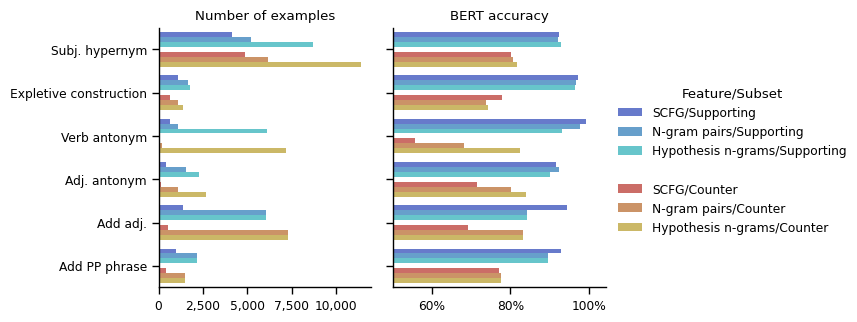

In [22]:
with sns.plotting_context("paper"):
    g = sns.catplot(
        data=df,
        y="Shortcut",
        x="value",
        hue="Feature/Subset",
        hue_order=["SCFG/Supporting",
                   "N-gram pairs/Supporting",
                   "Hypothesis n-grams/Supporting",
                   "",
                   "SCFG/Counter",
                   "N-gram pairs/Counter",
                   "Hypothesis n-grams/Counter"],
        palette=[hls[10], hls[9], hls[8], hls[-1],
                 hls[0], hls[1], hls[2]], 
        col="Metric",
        kind="bar",
        sharex=False,
        height=3.5,
    )
    g.axes[0, 1].set_xlim(0.5, None)
    g.set(ylabel="")
    g.axes[0, 0].set_title("Number of examples")
    g.axes[0, 1].set_title("BERT accuracy")
    g.axes[0, 0].set_xlabel("")
    g.axes[0, 1].set_xlabel("")
    g.axes[0, 0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    g.axes[0, 1].xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))